In [11]:
import pandas as pd
from datetime import datetime
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv('data/ab_test.csv')

df.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [12]:
df['time'] = pd.to_datetime(df['time'], format='%M:%S.%f')

df.head(20)

,id,time,con_treat,page,converted
0,851104,1900-01-01 00:11:48.600,control,old_page,0
1,804228,1900-01-01 00:01:45.200,control,old_page,0
2,661590,1900-01-01 00:55:06.200,treatment,new_page,0
3,853541,1900-01-01 00:28:03.100,treatment,new_page,0
4,864975,1900-01-01 00:52:26.200,control,old_page,1
5,936923,1900-01-01 00:20:49.100,control,old_page,0
6,679687,1900-01-01 00:26:46.900,treatment,new_page,1
7,719014,1900-01-01 00:48:29.500,control,old_page,0
8,817355,1900-01-01 00:58:09.000,treatment,new_page,1
9,839785,1900-01-01 00:11:06.600,treatment,new_page,1


In [13]:
df.columns = df.columns.str.strip()

# Print the columns to check again
print("Columns in DataFrame after stripping spaces:", df.columns)

Columns in DataFrame after stripping spaces: Index(['id', 'time', 'con_treat', 'page', 'converted'], dtype='object')


In [16]:
df_treatment = df[df['con_treat'] == 'treatment']
df_control = df[df['con_treat'] == 'control']
print(df_treatment['converted'].value_counts())
print(df_control['converted'].value_counts())

converted
0    129762
1     17514
Name: count, dtype: int64
converted
0    129479
1     17723
Name: count, dtype: int64


In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with the counts of converted and non-converted users for each group
data = {
    'Converted': [17514, 17723],  # Converted counts for treatment and control groups
    'Not Converted': [129762, 129479]         # Non-converted counts for treatment and control groups
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data, index=['Treatment', 'Control'])

# Perform chi-squared test
chi2, p_value, dof, expected = chi2_contingency(df)

# Set significance level
alpha = 0.05

# Print results
print("Chi-Squared Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:", expected)

# Interpret results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in conversion rates between groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in conversion rates between groups.")


Chi-Squared Statistic: 1.5159618356336582
p-value: 0.2182316121631168
Degrees of Freedom: 1
Expected Frequencies: [[ 17622.92739016 129653.07260984]
 [ 17614.07260984 129587.92739016]]
Fail to reject the null hypothesis. There is no significant difference in conversion rates between groups.


           Converted  Not Converted  Conversion Rate  CI Lower  CI Upper
Treatment      17514         129762         0.118920  0.117266  0.120573
Control        17723         129479         0.120399  0.118737  0.122062
Chi-Squared Statistic: 1.5159618356336582
p-value: 0.2182316121631168
Degrees of Freedom: 1
Expected Frequencies: [[ 17622.92739016 129653.07260984]
 [ 17614.07260984 129587.92739016]]
Fail to reject the null hypothesis. There is no significant difference in conversion rates between groups.


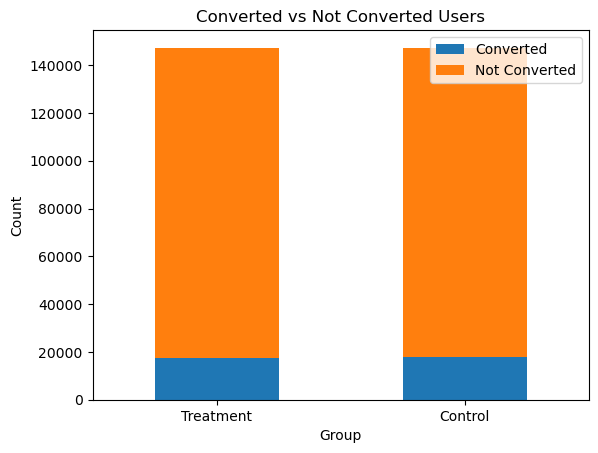

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np

def calculate_conversion_rates(df):
    df['Conversion Rate'] = df['Converted'] / (df['Converted'] + df['Not Converted'])
    return df

def calculate_confidence_intervals(df):
    z = 1.96  # For 95% confidence interval
    df['CI Lower'] = df['Conversion Rate'] - z * np.sqrt((df['Conversion Rate'] * (1 - df['Conversion Rate'])) / (df['Converted'] + df['Not Converted']))
    df['CI Upper'] = df['Conversion Rate'] + z * np.sqrt((df['Conversion Rate'] * (1 - df['Conversion Rate'])) / (df['Converted'] + df['Not Converted']))
    return df

def perform_chi_squared_test(df):
    chi2, p_value, dof, expected = chi2_contingency(df[['Converted', 'Not Converted']])
    return chi2, p_value, dof, expected

def visualize_results(df):
    df[['Converted', 'Not Converted']].plot(kind='bar', stacked=True)
    plt.title('Converted vs Not Converted Users')
    plt.xlabel('Group')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

def main():
    # Create a DataFrame with the counts of converted and non-converted users for each group
    data = {
        'Converted': [17514, 17723],  # Converted counts for treatment and control groups
        'Not Converted': [129762, 129479]  # Non-converted counts for treatment and control groups
    }

    # Convert the dictionary into a DataFrame
    df = pd.DataFrame(data, index=['Treatment', 'Control'])
    
    # Calculate conversion rates
    df = calculate_conversion_rates(df)
    
    # Calculate confidence intervals
    df = calculate_confidence_intervals(df)
    
    # Print conversion rates and confidence intervals
    print(df)
    
    # Perform chi-squared test
    chi2, p_value, dof, expected = perform_chi_squared_test(df)
    
    # Set significance level
    alpha = 0.05
    
    # Print results
    print("Chi-Squared Statistic:", chi2)
    print("p-value:", p_value)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:", expected)
    
    # Interpret results
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in conversion rates between groups.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in conversion rates between groups.")
    
    # Visualize the results
    visualize_results(df)

if __name__ == "__main__":
    main()
